# More Classical Mechanics

Lets solve a couple of more problems. The first we will solve will be a driven Harmonic oscillator to see its spectral response. The second is the van der Pol oscillator, which is a non-linear differential equation. 

The task is to (a) solve the time dependant equations, (b) plot the phase portrait and (c) understand some of the physics of these systems using the tools we learnt from numpy and other python packages.

# <font color='red'>Driven Damped Harmonic Oscillator </font>

## The equation of motion is

$\ddot{x}+\omega^2 x+\kappa\dot{x}=\varepsilon\cos(\omega_d t)$.

## Lets solve this problem


### Lets write this as two first order coupled differential equations, namely

$\dot{x}=p,\dot{p}=-\omega^2 x -\kappa p + \varepsilon\cos(\omega_d t)$

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint

In [8]:
def Damped_SHO_derivative(z, t, ω, ω_d, κ, ɛ): # Returns ẋ and ṗ for SHO.
    x = z[0]
    p = z[1] 
    dxdt = p
    dpdt = -(ω**2)*x-κ*p+ɛ*np.cos(ω_d*t)
    return [dxdt,dpdt]

In [9]:
x0 = 1.
p0 = -1. 
z0=[x0,p0]

ω, ω_d, κ, ɛ = 1., 1., 0.1, 1.

In [10]:
t = np.linspace(0,1000,10**4)

In [11]:
z = odeint(Damped_SHO_derivative,z0,t,args=(ω,κ,ɛ,ω_d))

In [12]:
odeint?

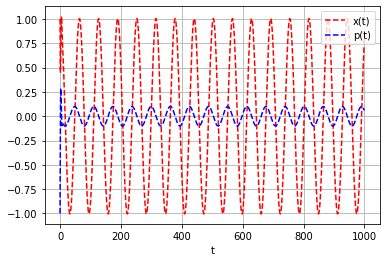

In [13]:
plt.plot(t, z[:, 0], 'r--', label='x(t)')

plt.plot(t, z[:, 1], 'b--', label='p(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

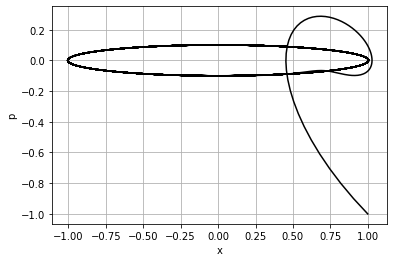

In [14]:
plt.plot(z[:, 0],z[:, 1],'k-')
plt.xlabel('x')
plt.ylabel('p')
plt.grid()
plt.show()

In [15]:
def vdp(z, t, ω, ω_d, κ, ɛ): # Returns ẋ and ṗ for SHO.
    x = z[0]
    p = z[1]
    
    dxdt = p
    dpdt = -(ω**2)*x+κ*(1-x**2)*p+ɛ*np.cos(ω_d*t)
    return [dxdt,dpdt]

In [16]:
t2 = np.linspace(0,10**3,10**5)

In [17]:
x0 = 10 # np.random.rand() 
p0 = 10 # np.random.rand() 
z0=[x0,p0]

ω, ω_d, κ, ɛ = 10., 10., -0.4, 0.3

In [18]:
z2 = odeint(vdp,z0,t2,args=(ω,κ,ɛ,ω_d))

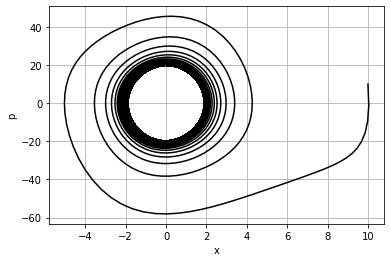

In [19]:
plt.plot(z2[:, 0],z2[:, 1],'k-')
plt.xlabel('x')
plt.ylabel('p')
plt.grid()
plt.show()

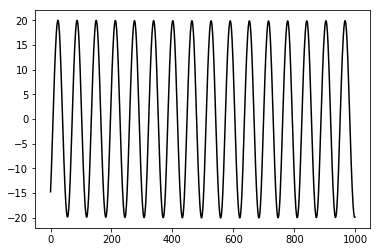

In [131]:
plt.plot(z2[-1000:,1],'k')

Assignment:

[1] Solve for dynamics of Lotka-Volterra Pretator-Prey model, given by $\dot{x}=\alpha x- \beta xy$ and $\dot{y}=-\gamma y +\delta xy$ with $\alpha=2/3,\beta=4/3,\gamma=\delta=1$. 

[2] The power spectral density is the power (intensity) of the harmonic excitation at a given frequency. The Weiner-Kinchin theorem states that for a real time series $x(t)$, the power spectrum is given by the Fourier transform of the autocorrelation function $G(\tau)$, where

$G(\tau):=\lim_{T\rightarrow \infty}\frac{1}{T}\int_{0}^{T}dt x(t) x(t+\tau)$

and

$S(\omega):=\lim_{T\rightarrow\infty}\frac{1}{2\pi T}\vert\tilde{x}(\omega)\vert^2:=\int_{-\infty}^{\infty}d\tau e^{-i\omega \tau}G(\tau)$


Write a code to calculate it for a damped harmonic oscillator. 

